# No. 1

In [ ]:
zip_path = '/content/drive/My\ Drive/Images/cats-dogs.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

!rm /content/cats-dogs.zip

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

# Deeper Layer CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.01, momentum=0.9)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 80000)            

In [ ]:
dataset_dir = '/content/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [ ]:
history_base_model = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=75)

Epoch 1/75
100/100 [==============================] - 126s 1s/step - loss: 0.7815 - accuracy: 0.5544 - val_loss: 0.6837 - val_accuracy: 0.6083
Epoch 2/75
100/100 [==============================] - 126s 1s/step - loss: 0.6530 - accuracy: 0.6102 - val_loss: 0.5919 - val_accuracy: 0.6896
Epoch 3/75
100/100 [==============================] - 125s 1s/step - loss: 0.6036 - accuracy: 0.6776 - val_loss: 0.5590 - val_accuracy: 0.7140
Epoch 4/75
100/100 [==============================] - 126s 1s/step - loss: 0.5594 - accuracy: 0.7145 - val_loss: 0.5127 - val_accuracy: 0.7420
Epoch 5/75
100/100 [==============================] - 126s 1s/step - loss: 0.5396 - accuracy: 0.7264 - val_loss: 0.5067 - val_accuracy: 0.7575
Epoch 6/75
100/100 [==============================] - 125s 1s/step - loss: 0.5041 - accuracy: 0.7502 - val_loss: 0.4801 - val_accuracy: 0.7655
Epoch 7/75
100/100 [==============================] - 125s 1s/step - loss: 0.4900 - accuracy: 0.7643 - val_loss: 0.4604 - val_accuracy: 0.7753

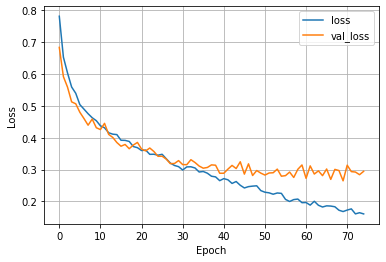

In [ ]:
plot_loss(history_base_model)

# Baseline CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

baseline_model = Sequential()
baseline_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
baseline_model.add(MaxPooling2D((2, 2)))

baseline_model.add(Flatten())

baseline_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
baseline_model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)

baseline_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

baseline_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 320000)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               40960128  
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 40,961,153
Trainable params: 40,961,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_baseline_model = baseline_model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=75)

Epoch 1/75
100/100 [==============================] - 47s 465ms/step - loss: 0.7174 - accuracy: 0.5539 - val_loss: 0.6838 - val_accuracy: 0.5209
Epoch 2/75
100/100 [==============================] - 46s 459ms/step - loss: 0.6659 - accuracy: 0.5902 - val_loss: 0.6503 - val_accuracy: 0.6190
Epoch 3/75
100/100 [==============================] - 46s 457ms/step - loss: 0.6505 - accuracy: 0.6147 - val_loss: 0.6436 - val_accuracy: 0.6208
Epoch 4/75
100/100 [==============================] - 46s 459ms/step - loss: 0.6307 - accuracy: 0.6346 - val_loss: 0.6305 - val_accuracy: 0.6368
Epoch 5/75
100/100 [==============================] - 46s 457ms/step - loss: 0.6248 - accuracy: 0.6433 - val_loss: 0.6175 - val_accuracy: 0.6510
Epoch 6/75
100/100 [==============================] - 46s 462ms/step - loss: 0.6222 - accuracy: 0.6472 - val_loss: 0.6348 - val_accuracy: 0.6079
Epoch 7/75
100/100 [==============================] - 46s 461ms/step - loss: 0.6114 - accuracy: 0.6612 - val_loss: 0.6638 - val_ac

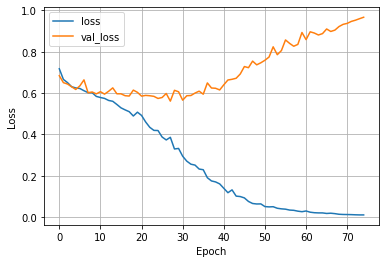

In [ ]:
plot_loss(history_baseline_model)

# Kesimpulan

Dari data di atas, Deeper Layer CNN memiliki nilai validation accuracy 0.8948 pada epoch 61 dan Baseline CNN memiliki nilai validation accuracy 0.7251 pada epoch 31. Pada deeper layer CNN melakukan epoch sebanyak 75x dan mendapat hasil keakurasian yang lebih tinggi dibandingkan Baseline CNN.

Hal ini menunjukan convolution layer yang lebih dalam, bisa mengambil feature yang lebih banyak lagi dari data-data hasil augmentasi. Dari hasil data yang augmentasi, kemampuan untuk melihat data yang belum pernah di lihat sebelumnya lebih baik. Kesimpulan yang didapat ialah plot epoch-loss bisa berbeda-beda tergantung dari data, hyperparameter, dan susunan layer yang digunakan. Ditentukan ideal atau tidaknya berdasarkan dari akurasi dan apakah model sudah converge.

  